# Telco Churn

## Goal: 
* Discover what is driving churn and create a model to predict at-risk churners.

## Imports

In [1]:
import wrangle as wr
import explore as ex
import stats_conclude as sc
import evaluate as ev
import scipy.stats as stats
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

> # `Wrangle`

### Acquire
* Data acquired from mySQL Codeup Server using env.py credentials
* It contained 7,043 rows and 24 columns before cleaning/encoding
* Each row represents a customer
* Each column represents a demographic feature of the customer or the business

### Prepare
* Checked column data types
    * changed total charges from an object to a float
* Checked for nulls
    * total charges contained 11 nulls for new customers
    * imputed the corresponding monthly charges value
* Encoded categoricals
* Split data into train, validate and test (60/20/20)
    * target = 'churn'
* Outliers have not been removed for this iteration of the project

### Data Dictionary


| Feature | Definition |
|:--------|:-----------|
|Churn|  Whether or not a customer has churned|
|Phone Service| Whether or not the customer has a phone line|
|Internet Service Type| Customer's type of internet (Fiber optic, DSL, None)|
|Total Charges| The total charges a customer has paid|
|Contract Type| Customer contract type (Month-to-month, One year, Two year)|
|Multiple Lines| Whether a customer has more than one line|

In [2]:
# acquiring data
df = wr.get_telco_churn()

# cleaning data and saving to a clean_df
df_clean = wr.clean_telco(df)

# splitting data - returns shape to verify proper split sizes
train, validate, test = wr.split_telco(df_clean)


CSV file found...
Load in successful, preparing to split...
Prepared DF: (7043, 28)
Train: (4225, 28)
Validate: (1409, 28)
Test: (1409, 28)


> # `Explore`

### Questions To Answer:
1. Are phone service and fiber internet related?

2. From a revenue standpoint, where should we focus our initial efforts?

3. Are multiple line phone contracts causing churn? Why?

4. Were average monthly charges higher for churned phone customers?

---
### Phone:

* $15,035,873.75 revenue

    * 6,361 customers = 90% of total customer base
---
### Fiber Internet:
* $9,923,622.95 revenue
    * 3,096 customers = 44% of total customer base
    
---
### Interesting Note:
* All fiber customers have phone service!
* Since these are related, and phone service provides 15 million in revenue, I decided to look into phone service contracts...
---

# 1. Are Fiber and Phone Related?

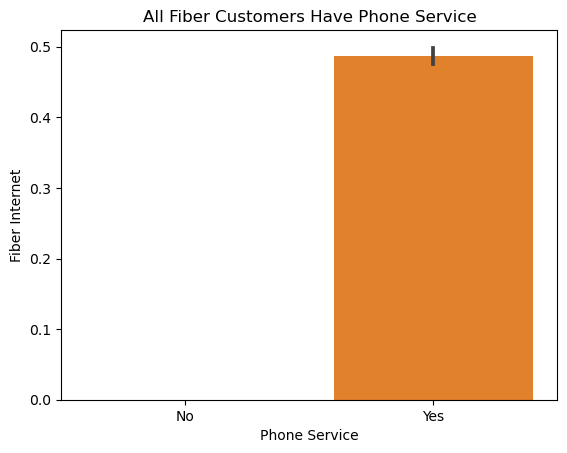

In [3]:
ex.phone_fiber(df_clean)

### Chi^2 Statistic Test

In [4]:
sc.chi2_test(df_clean)

We reject the null hypothesis. Phone and Fiber are related.


# 2. From a revenue standpoint, where should we focus our initial efforts?

Since phone and fiber are related, what happens to phone numbers affects fiber numbers as well.

### **PHONE**

* Churn rate of **96%** for monthly phone contracts
    * Costs Telco **$2,600,062.40**
    * 1,297 customers lost
    
---    

**|CHURNED PHONE|** 
* **43%** churn rate
* **$12.55** higher monthly average

* 25th percentile:  **$24.31** higher/month

* 50th percentile:  **$10.30** higher/month

* 75th percentile:  **$7.33** higher/month

---

**|CHURNED MONTH-TO-MONTH FIBER|**
* **53.9%** churn rate
* **$-1.21** higher monthly average

* 25th percentile:  **$-8.96** higher/month

* 50th percentile:  **$-2.47** higher/month

* 75th percentile:  **$-0.01** higher/month

---

**|CHURNED ONE LINE, MONTH-TO-MONTH, PHONE|**
* **38.7%** churn rate
* **$12.95** higher monthly average

* 25th percentile:  **$29.88** higher/month

* 50th percentile:  **$15.95** higher/month

* 75th percentile:  **$6.30** higher/month

The problem isn't with the fiber charges, it's with monthly charges for one-line, month-to-month phone customers because everyone who has fiber... has at least one line of phone service.

# 3. Are multiple line phone contracts experiencing churn? Why?

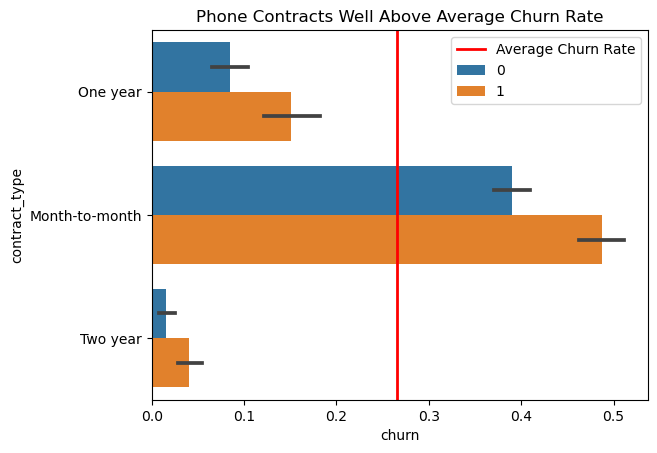

In [5]:
ex.monthly_phone_churn(df_clean)

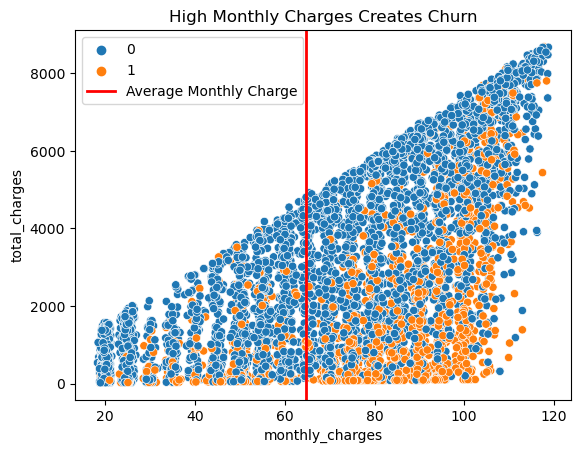

In [6]:
ex.total_monthly(df_clean)

### Statistics Tests

* Mann-Whitney U

Phone service / churn?


In [7]:
sc.conclude_mannwhitneyu(df_clean.phone_service, df_clean.churn)

t-stat: 40620502.5
p-value: 0.0 < 0.05?
We reject the null hypothesis.


Monthly charges / churn?

In [8]:
sc.conclude_mannwhitneyu(df_clean.monthly_charges, df_clean.churn)

t-stat: 49603849.0
p-value: 0.0 < 0.05?
We reject the null hypothesis.


Phone service / monthly charges?

In [9]:
sc.conclude_mannwhitneyu(df_clean.phone_service, df_clean.monthly_charges)

t-stat: 0.0
p-value: 0.0 < 0.05?
We reject the null hypothesis.


# 4. Were average monthly charges higher for churned phone customers?

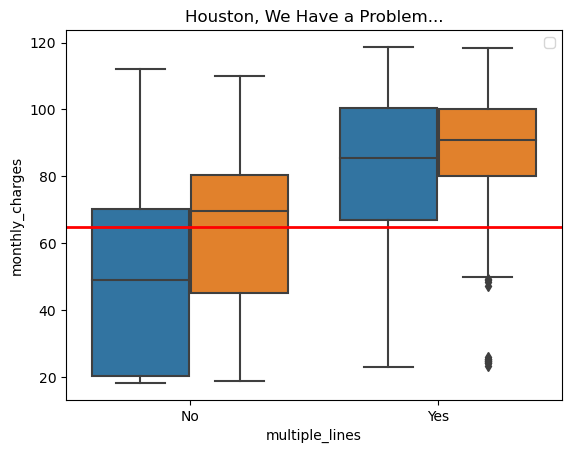

In [10]:
ex.box_plot_monthly_multiple(df_clean)

### Features to Model:
* Phone Service 
* Internet Service
* Monthly Charges
* Total Charges
* Contract Type
* Multiple Lines

> # `Model`

* Accuracy is the evaluation metric
    * Focus is to accurately predict potential churn for this iteration
    
* Positive Case: No Churn (0)
        
* Model, Train, Validate:
    * Decision Tree: 78%, 80%
    * Random Forest: 78%, 80%
    * KNN: 79%, 80%
    * Logistic Regression: 78%, 79%

### Model to Test
* Accuracy is the evaluation metric
* Random Forest with a max depth of 6 to model.

In [11]:
# MODEL
ev.random_forest_test(test)

This is the Random Forest Model with a Max Depth of 6
and ran on the test set.

For a depth of 6, the accuracy is 0.82

The baseline accuracy is 0.73

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1035
           1       0.73      0.51      0.60       374

    accuracy                           0.82      1409
   macro avg       0.79      0.72      0.74      1409
weighted avg       0.81      0.82      0.81      1409

The model beats on baseline.


> # `Conclusion`

## Explore

* Fiber and phone are related.

* Phone contracts are churning because monthly charges are, on average, $13 higher for one line, churned phone customers, leading me to focus efforts here.


## Modeling
* Beat on baseline by 9% using Random Forest.

## Recommendations

* Reduce cost of monthly contracts for one line phone service customers and we will see results with phone and fiber customer numbers.


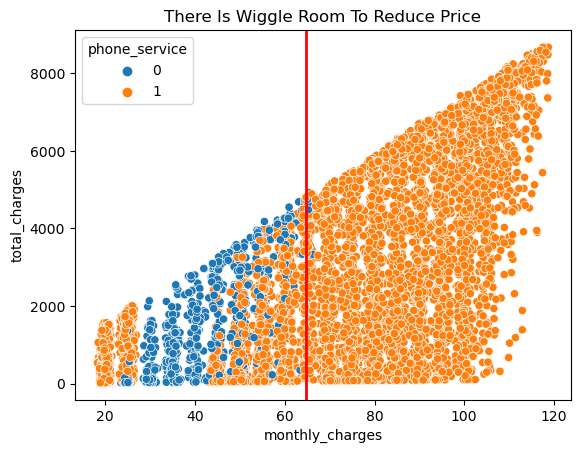

In [12]:
ex.fiber_average_cost(df_clean)

* There is wiggle room to reduce price for phone customers!

* We can afford to reduce monthly contract price by $10.

## Write to CSV to Predict Churn

In [13]:
ev.to_csv(train, test)